필요 libary를 import, Data read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duran y More, Miss. Asuncion",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
len(test)

418

2. 시각화를 통한 데이터 확인

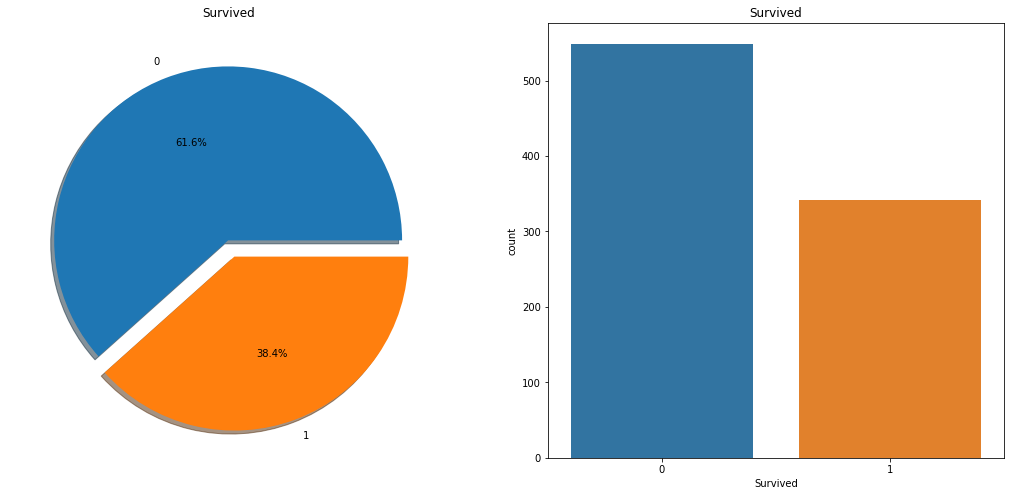

In [4]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

train 데이터를 확인 결과, 생존율이 약 61.6% 인 것을 확인

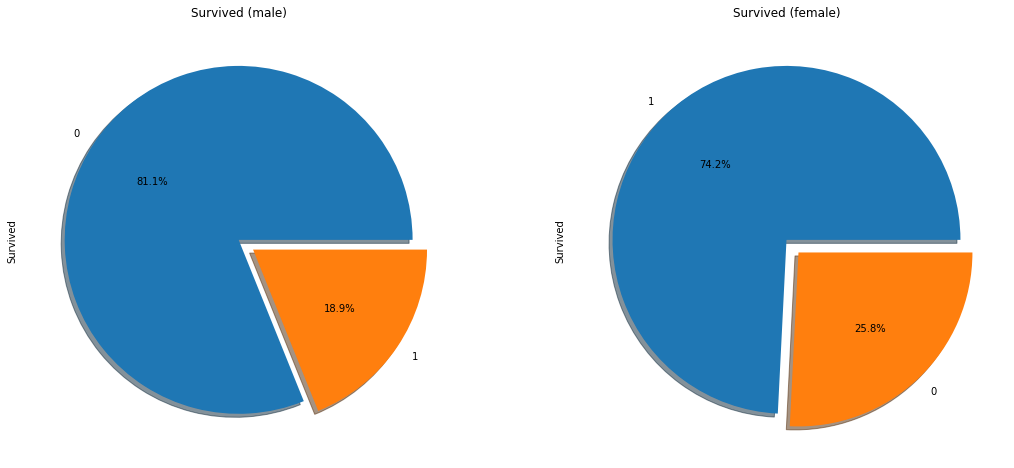

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

남성의 경우 생존률이 81.1 % 여성의 경우 74.2% 인 것을 확인 가능

In [6]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survied','Dead']
    df.plot(kind='bar',stacked=True)

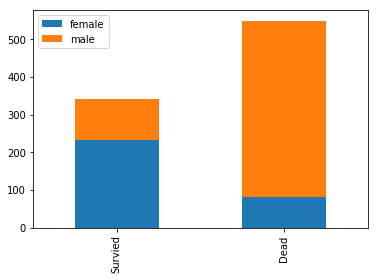

In [7]:
bar_chart('Sex')

수를 확인해보니, 남성의 사망자 수 비율이 더 높은 것을 시각적으로 확인 가능

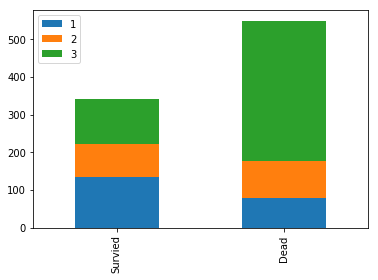

In [8]:
bar_chart('Pclass')

Personal Class가 낮을 수록(3에 가까울 수록) 사망자가 많은 것을 확인 가능

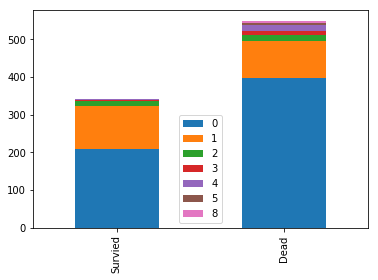

In [9]:
bar_chart('SibSp')

대부분이 형제,배우자가 없는 경우이며 사망자 역시 많은 것으로 파악 가능

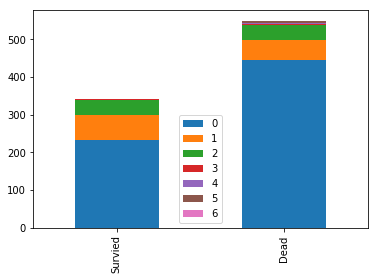

In [10]:
bar_chart('Parch')

대부분 부모나 자식이 없는 사람들이며, 사망자 역시 많은 것으로 확인 가능

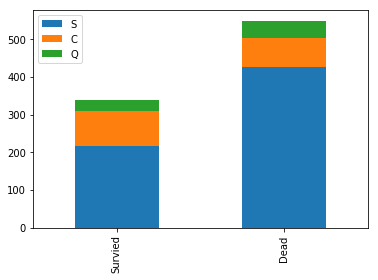

In [11]:
bar_chart('Embarked')

사우스햄튼에서 많은 사람들이 탑승했으며 사망비율도 높은것으로 파악됨

3. 학습을 하기 전 null 값 유무를 파악

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age 칼럼의 경우 데이터 소실이 많음. 허나 중요한 요소로 파악되어 이를 채우기 위한 노력이 필요

Cabin 칼럼은 데이터 소실이 많음(77% 가량). 이제 사용하지 않지 않음

Embarked 칼럼은 train 데이터에서만 2개의 소실데이터가 존재. 이에 가장 많은 비율인 'S'로 대체

4. 데이터 다듬기

4-1 'Name' 칼럼은 자식 여부, 계급 등을 알 수 있는 지표일 것이라 가정 ex)mrs,mr,miss 등
    이에 학습률을 높이기 위해 필요한 정보를 추출하여 전처리

In [14]:
train_test_data = [train, test] #데이터 전처리를 위해 통합

In [15]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)


In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Countess      1
Jonkheer      1
Ms            1
Don           1
Lady          1
Capt          1
Sir           1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [19]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,"Master":3,
                 "Dr":4, "Rev":4, "Major":4, "Col":4, "Mlle":4, "Lady":4,"Mme":4,
                 "Sir":4, "Jonkheer":4, "Ms":4, "Capt":4, "Don":4, "Dona":4,"Countess":4}
#Mr 은 0, Miss는 1, Mrs는 2, Master는 3 그 외는 4으로 전처리
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


4-2 'Sex' 칼럼은 male, female의 값을 가지므로 이를 정수형으로 변경

In [23]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({"male":0, "female":1})

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


4-3 'Age' 칼럼은 값의 범위가 크기에 이를 줄이기 위한 노력과 동시에 null 값을 채워야함.

In [25]:
train['Age'][train['Sex']==0].mean(),train['Age'][train['Sex']==1].mean()

(30.72664459161148, 27.915708812260537)

In [26]:
#idea 무작정 평균값을 넣는 것이 아닌, 성별, Title별로 나이의 평균값을 넣는다.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


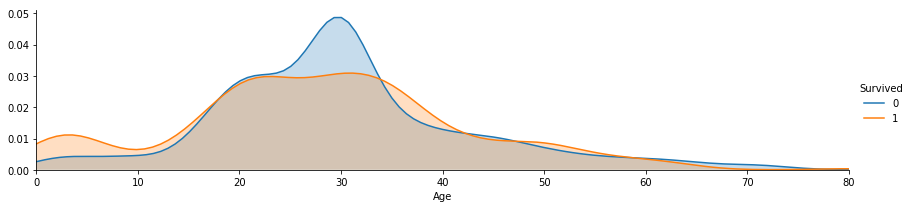

In [27]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

나이 분포가 바뀐 것을 확인 가능

In [28]:
train['Age'].max(),test['Age'].max() #가장 연장자가 80세 인것으로 확인 가능

(80.0, 76.0)

4-4. Embarked 칼럼은 Null값이 train data에 2개 존재. 이를 채우고 문자열 범주를 정수로 대체

In [29]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

In [30]:
for dataset in train_test_data: #train data의 Null 값을 가장 많은 비율을 차지하는 S로 대체
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [31]:
embarked_mapping = {"S":int(0), "C":int(1), "Q":int(2)}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


4-5. Fare 칼럼은 test 데이터에 null값이 하나 존재. 운임비이므로 중요 데이터가 될 수 있는 만큼 Pclass 의 중간값을 더해준다.

In [33]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


4-6 Cabin 칼럼은 최초 드랍했으나, 등급별로 구매할 수 있는 차이가 있으리라 생각됨. 이에 분류

In [35]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
C22 C26            3
F33                3
D                  3
F2                 3
E101               3
D20                2
B22                2
D17                2
B28                2
C124               2
D35                2
B51 B53 B55        2
B58 B60            2
B35                2
B57 B59 B63 B66    2
B77                2
C78                2
B49                2
E44                2
E33                2
C68                2
C126               2
E24                2
C52                2
B5                 2
B20                2
D33                2
                  ..
E68                1
E31                1
D37                1
D7                 1
A20                1
B69                1
B102               1
B82 B84            1
A34                1
E12                1
C106               1
A10                1
B50                1
C49                1
D10 D12            1
B4                 1
B39          

데이터의 전부가 알파벳으로 시작함 이에 알파벳으로만 남김

In [36]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [37]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

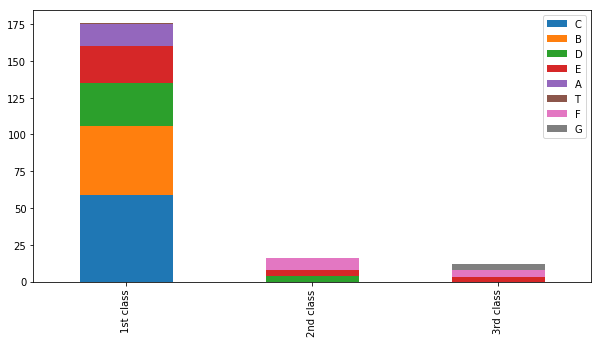

In [38]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked=True, figsize=(10, 5))


In [39]:
cabin_mapping = {"A":0, "B":0.6, "C":1.2, "D":1.8, "E":2.4, "F":3.0, "G":3.6, "T":4.2}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

값을 너무 크게 두면 학습시 영향력 차이가 클 수 있어 0.5 정도로 나누어 등급화

In [40]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

null 값은 Pclass의 평균으로 채움

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,3.0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1.2,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,3.0,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,1.2,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,3.0,0,0


4-7 SibSp, Parch는 가족의 수로 하나로 통합 가능성이 있음. 그러나 분리의 필요성 역시 존재.

In [42]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [43]:
family_mapping = {1:0, 2:0.5, 3:1.0, 4:1.5, 5:2.0, 6:2.5, 7:3.0, 8:3.5, 9:4.0, 10:4.5, 11:5.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)


불필요한 Ticket,PassendgerId 칼럼 삭제

In [44]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,3.0,0,0,0.5
1,1,1,1,38.0,71.2833,1.2,1,2,0.5
2,1,3,1,26.0,7.9250,3.0,0,1,0.0
3,1,1,1,35.0,53.1000,1.2,0,2,0.5
4,0,3,0,35.0,8.0500,3.0,0,0,0.0


5.  MinMaxScaler() 통해 데이터 오차범위 줄이기

In [45]:
from sklearn.preprocessing import MinMaxScaler

def normalize_value(data,column):
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1,1))
    return data

train= normalize_value(train,'Age')
train= normalize_value(train,'Fare')
test= normalize_value(test,'Age')
test= normalize_value(test,'Fare')
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,0.271174,0.014151,3.0,0,0,0.5
1,1,1,1,0.472229,0.139136,1.2,1,2,0.5
2,1,3,1,0.321438,0.015469,3.0,0,1,0.0
3,1,1,1,0.434531,0.103644,1.2,0,2,0.5
4,0,3,0,0.434531,0.015713,3.0,0,0,0.0


이상으로 데이터 전처리(학습 전 가공) 마무리

5. 데이터 모델링

In [46]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
test = test.drop(['PassengerId'], axis=1)

In [47]:
import tensorflow as tf
train_x = train_data
df = pd.DataFrame(target) # 산사람과 죽은사람으로 나누어서 DataFrame으로 저장
df.columns = ['Survived'] # index명 지정
train_y = df
test_x = test
test_y = pd.read_csv('data/gender_submission.csv')
df = pd.DataFrame(test_y['Survived'])
df.columns = ['Survived']
test_y = df

In [48]:
train_x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,0.271174,0.014151,3.0,0,0,0.5
1,1,1,0.472229,0.139136,1.2,1,2,0.5
2,3,1,0.321438,0.015469,3.0,0,1,0.0
3,1,1,0.434531,0.103644,1.2,0,2,0.5
4,3,0,0.434531,0.015713,3.0,0,0,0.0


In [49]:
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [50]:
test_x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,0.452723,0.015282,3.0,2,0,0.0
1,3,1,0.617566,0.013663,1.2,0,2,0.5
2,2,0,0.815377,0.018909,3.0,2,0,0.0
3,3,0,0.353818,0.016908,1.2,0,0,0.0
4,3,1,0.287881,0.023984,3.0,0,2,1.0


In [51]:
test_y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [52]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,0.271174,0.014151,3.0,0,0,0.5
1,1,1,1,0.472229,0.139136,1.2,1,2,0.5
2,1,3,1,0.321438,0.015469,3.0,0,1,0.0
3,1,1,1,0.434531,0.103644,1.2,0,2,0.5
4,0,3,0,0.434531,0.015713,3.0,0,0,0.0


In [53]:
type(train['Embarked'][30])

numpy.int64

In [54]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,0.452723,0.015282,3.0,2,0,0.0
1,3,1,0.617566,0.013663,1.2,0,2,0.5
2,2,0,0.815377,0.018909,3.0,2,0,0.0
3,3,0,0.353818,0.016908,1.2,0,0,0.0
4,3,1,0.287881,0.023984,3.0,0,2,1.0


In [55]:
X = tf.placeholder(tf.float32, shape=[None, 8]) #input이 8개
Y = tf.placeholder(tf.float32, shape=[None, 1]) #output 0 or 1 ->survived or dead

W = tf.get_variable("W", shape=[8, 10], initializer=tf.contrib.layers.xavier_initializer())
                                        #xavier 사용
b = tf.Variable(tf.random_normal([10]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b) #sigmoid
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis)) #logistic regression

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, optimizer], feed_dict={X:train_x, Y:train_y})
        if step % 1000 == 0:
            print(step, cost_val)
                  
    print('-----------------------------')
    print('train_data = ', len(train_x), 'test_data = ', len(test_x))

    h, c, y, a = sess.run([hypothesis, predicted, Y, accuracy], feed_dict={X:test_x, Y:test_y})
    print('\n Predicted: ', c,'\nAccuracy: ', a)
    
    dicaprio = np.array([3,0,0.233476,0.010364,0,2,0,0]).reshape(1,8)
    winslet = np.array([1,1,0.208344,1.000000,4.2,2,1,1.0]).reshape(1,8)
    
    dica = sess.run(hypothesis, feed_dict={X: dicaprio})
    wins = sess.run(hypothesis, feed_dict={X: winslet})


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
0 1.1038135
1000 0.5020916
2000 0.45224252
3000 0.4376016
4000 0.43113086
5000 0.42795613
6000 0.42618537
7000 0.42514944
8000 0.42460433
9000 0.42437458
10000 0.4243083
-----------------------------
train_data =  891 test_data =  418

 Predicted:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Accuracy:  0.9382775


In [56]:
dica_predict=dica.mean()
wins_predict=wins.mean()

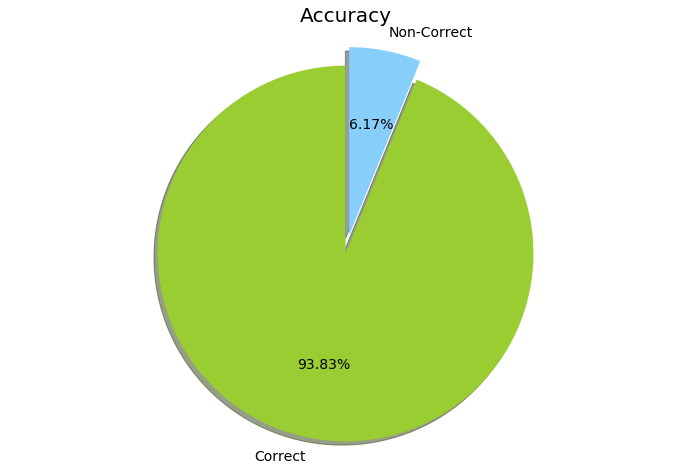

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

group_names = ['Correct','Non-Correct']
group_sizes = [a,1-a]
group_colors = ['yellowgreen', 'lightskyblue']
group_explodes = (0.1, 0)
plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('Accuracy', fontsize=20)
plt.show()


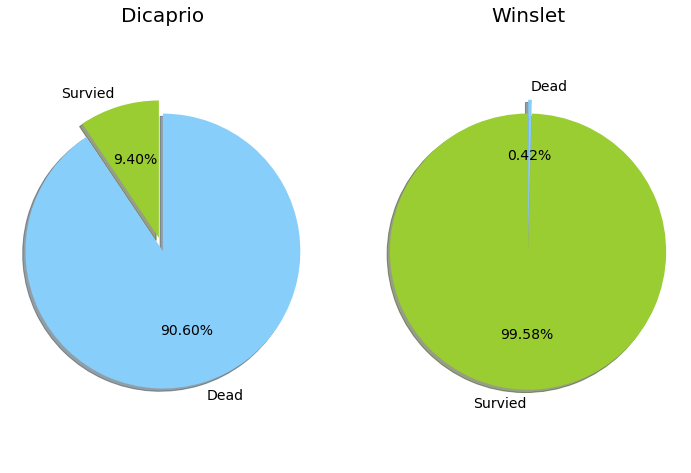

In [58]:
plt.subplot(1,2,1)
group_names = ['Survied','Dead']
group_sizes = [dica_predict,1-dica_predict]
group_colors = ['yellowgreen', 'lightskyblue']
group_explodes = (0.1, 0)
plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('Dicaprio', fontsize=20)
plt.subplot(1,2,2)
group_names = ['Survied','Dead']
group_sizes = [wins_predict,1-wins_predict]
group_colors = ['yellowgreen', 'lightskyblue']
group_explodes = (0.1, 0)
plt.pie(group_sizes, 
        explode=group_explodes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # second decimal place
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) # text font size
plt.axis('equal') #  equal length of X and Y axis
plt.title('Winslet', fontsize=20)
plt.show()